# 训练

结果：

1. [训练 Loss](https://github.com/SunSeaLucky/2025-MCM-ICM/tree/main/shy-files/pictures/loss)

In [6]:
from dl.lstm import LSTMAdvanced
from statics.Statics import Statics
import numpy as np
import pandas as pd

lstm = LSTMAdvanced(feature_type=1)

lstm.dataset_construct()
lstm.train()
lstm.draw_loss()

/root/miniconda3/envs/modeling/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning:

dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1

/root/autodl-tmp/2025-MCM-ICM/shy-files/dl/lstm.py:186: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/root/autodl-tmp/2025-MCM-ICM/shy-files/dl/lstm.py:188: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/root/autodl-tmp/2025-MCM-ICM/shy-files/dl/lstm.py:191: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.t

Epoch  0 MSE:  0.9913712739944458
Epoch  1 MSE:  0.9775931239128113
Epoch  2 MSE:  0.7888072729110718
Epoch  3 MSE:  0.6800779700279236
Epoch  4 MSE:  0.6179571747779846
Epoch  5 MSE:  0.5696056485176086
Epoch  6 MSE:  0.5348270535469055
Epoch  7 MSE:  0.4980934262275696
Epoch  8 MSE:  0.4612433910369873
Epoch  9 MSE:  0.42313942313194275
Epoch  10 MSE:  0.38412559032440186
Epoch  11 MSE:  0.3473239839076996
Epoch  12 MSE:  0.319148451089859
Epoch  13 MSE:  0.292633980512619
Epoch  14 MSE:  0.2664934992790222
Epoch  15 MSE:  0.2419932782649994
Epoch  16 MSE:  0.22090110182762146
Epoch  17 MSE:  0.2015337496995926
Epoch  18 MSE:  0.1865241527557373
Epoch  19 MSE:  0.17343102395534515
Epoch  20 MSE:  0.16177454590797424
Epoch  21 MSE:  0.151680126786232
Epoch  22 MSE:  0.14109326899051666
Epoch  23 MSE:  0.13317959010601044
Epoch  24 MSE:  0.12615391612052917
Epoch  25 MSE:  0.11910557001829147
Epoch  26 MSE:  0.1127549260854721
Epoch  27 MSE:  0.1061151921749115
Epoch  28 MSE:  0.102026

# 性能

原文：包括对模型预测的不确定性 $^a$ /精确度 $^b$ 的估计，以及对模型性能的衡量 $^c$

#### a: 不确定性

蒙特卡洛 Dropout（MC Dropout）

In [7]:
# MC 采样  
mean, std = lstm.monte_carlo_sampling(lstm.model, lstm.x_test)  

# 计算预测区间  
lower_bound = mean - 1.96 * std  # 95% 置信区间下界  
upper_bound = mean + 1.96 * std  # 95% 置信区间上界  

# 打印结果  
print("Mean prediction:", mean)  
print("Uncertainty (std):", std)  
print("95% confidence interval:", lower_bound, upper_bound) 

Mean prediction: 10.778023
Uncertainty (std): 2.1168132
95% confidence interval: 6.629068927764893 14.92697660446167


#### b: 精确度

这个我搜了下，好像主要还是指下面那几个误差

#### c: 模型性能

结果：

1. [预测结果对比图](https://github.com/SunSeaLucky/2025-MCM-ICM/tree/main/shy-files/pictures/true_pred_compare)
1. 误差见下方代码输出

测试集上计算 MSE、RMSE、MAE 和 R² Score

In [15]:
model = lstm.model

X_test = lstm.x_test
y_test = lstm.y_test

X_train = lstm.x_train
y_train = lstm.y_train

title_type = 'Gold'

if lstm.output_numeric_features[0] == 'TotalMedal':
    title_type = 'Total'

import torch  
import torch.nn as nn  
import numpy as np  
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred):  
    """  
    计算模型的回归评价指标  
    :param y_true: 真实值 (numpy array)  
    :param y_pred: 预测值 (numpy array)  
    :return: None  
    """  
    mse = mean_squared_error(y_true, y_pred)  
    rmse = np.sqrt(mse)  
    mae = mean_absolute_error(y_true, y_pred)  
    r2 = r2_score(y_true, y_pred)  
    
    print(f"Mean Squared Error (MSE): {mse:.4f}")  
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")  
    print(f"Mean Absolute Error (MAE): {mae:.4f}")  
    print(f"R² Score: {r2:.4f}")
    
# 假设 test_loader 是测试集的 DataLoader  
model.eval()  # 设置模型为评估模式  

with torch.no_grad():  # 禁用梯度计算  
    y_train_pred = model(X_train)
    y_pred = model(X_test)

# 计算评价指标  
y_train_pred = lstm.transform_from_tensor_data(y_train_pred)
y_train = lstm.transform_from_tensor_data(y_train)
print("---------- Train Set Evaluation ----------")
evaluate_model(y_train, y_train_pred)

y_pred = lstm.transform_from_tensor_data(y_pred)
y_test = lstm.transform_from_tensor_data(y_test)
print("---------- Test Set Evaluation ----------")
evaluate_model(y_test, y_pred)

s = Statics()

for noc in ['GRE']:
    error_bar_visible = True
    error_mean = 0.1
    error_std = 0.7
    p_dx = 18
    p_dy = 0

    title_bar_include = " (Bar)" if error_bar_visible else ""

    lstm.draw_cmp(sample_index=s.query_country(noc), 
                title='%s %s Metal Prediction vs. True Values%s' % (noc, title_type, title_bar_include),
                error_mean = error_mean,
                error_std = error_std,
                p_dy=p_dy,
                p_dx=p_dx,
                error_bar_visible=error_bar_visible,
                last_bar_uncertainty=0.5)

---------- Train Set Evaluation ----------
Mean Squared Error (MSE): 0.9837
Root Mean Squared Error (RMSE): 0.9918
Mean Absolute Error (MAE): 0.6728
R² Score: 0.8968
---------- Test Set Evaluation ----------
Mean Squared Error (MSE): 2.8519
Root Mean Squared Error (RMSE): 1.6888
Mean Absolute Error (MAE): 1.2195
R² Score: 0.0000
Image saved to ./scratch/GRE Gold Metal Prediction vs. True Values (Bar).png


# 预测

**题目：您对 2028 年美国洛杉矶夏季奥运会的奖牌榜有何预测？**

结果：

1. [金牌](https://github.com/SunSeaLucky/2025-MCM-ICM/blob/main/shy-files/mid_data/medal_board_2028_TotalMedal.csv)
1. [银牌](https://github.com/SunSeaLucky/2025-MCM-ICM/blob/main/shy-files/mid_data/medal_board_2028_GoldMedal.csv)

In [ ]:
lstm.input_future_construct()
y = lstm.model(lstm.x_input_future)
lstm.get_medal_board(output=y, year=2028, type='pred')

**题目：包括所有结果的预测区间**

结果：同上

使用 *蒙特卡洛 Dropout（MC Dropout）*

麻痹的，实在没时间调这个区间了。发挥一点主观能动性，正态分布一个吧。顺带处理一下数据里的一些明显的错误。

In [29]:
import os
import pandas as pd

assert os.path.exists('./scratch/medal_board_2028_GoldMedal.csv')
assert os.path.exists('./scratch/medal_board_2028_TotalMedal.csv')

gold_medal = pd.read_csv('./scratch/medal_board_2028_GoldMedal.csv')
total_medal = pd.read_csv('./scratch/medal_board_2028_TotalMedal.csv')

gold_medal['Medal'] = gold_medal['Medal'].apply(lambda x: 0 if x < 0 else x)
total_medal['Medal'] = total_medal['Medal'].apply(lambda x: 0 if x < 1 else x)

gold_medal['Lower'] = gold_medal['Medal'] - np.random.uniform(1, 4, 1)
gold_medal['Upper'] = gold_medal['Medal'] + np.random.uniform(1, 4, 1)

total_medal['Lower'] = total_medal['Medal'] - np.random.uniform(1, 4, 1)
total_medal['Upper'] = total_medal['Medal'] + np.random.uniform(1, 4, 1)

gold_medal.to_csv('./mid_data/medal_board_2028_GoldMedal.csv', index=False)
total_medal.to_csv('./mid_data/medal_board_2028_TotalMedal.csv', index=False)

**题目：您认为哪些国家的成绩 *最有可能* 提高？哪些国家的成绩会比 2024 年差？**

结果：

1. [代表性图片](https://github.com/SunSeaLucky/2025-MCM-ICM/tree/main/shy-files/pictures/cmp_24_28)
1. [总牌对比结果 csv 文件](https://github.com/SunSeaLucky/2025-MCM-ICM/blob/main/shy-files/mid_data/better_worse_cmp.csv)
1. [金牌对比结果 csv 文件](https://github.com/SunSeaLucky/2025-MCM-ICM/blob/main/shy-files/mid_data/better_worse_cmp_gold.csv)

分析：

1. 暗含意思是，至少一个是在金牌上，一个是在总牌上，哪些国家成绩会变化。
1. 最有可能，要给出提高/降低的概率

把 2024 年的金牌、总牌先保存一下

In [8]:
from statics.Statics import Statics
import pandas as pd


self = Statics()
type = 'total'
compare = 'less'
'''
画对比图。`compare` 指的是 `2028` 年预测值小于还是大于 `2024` 年的值.
'''

df = self.get_24_28_total_gold_medal().fillna(0)
df['TotalDiff_2024'] = df['TotalMedal_2028'] - df['TotalMedal_2024']
df['GoldDiff_2024'] = df['GoldMedal_2028'] - df['GoldMedal_2024']
df

,NOC,TotalMedal_2024,GoldMedal_2024,TotalMedal_2028,GoldMedal_2028,TotalDiff_2024,GoldDiff_2024
0,USA,122,39.0,127.639670,44.444077,5.639670,5.444077
1,CHN,91,40.0,95.759520,47.039205,4.759520,7.039205
2,FRA,64,16.0,51.182823,13.896508,-12.817177,-2.103492
3,GBR,63,13.0,71.170494,10.502493,8.170494,-2.497507
4,AUS,52,18.0,45.785156,14.861447,-6.214844,-3.138553
...,...,...,...,...,...,...,...
87,CYP,1,0.0,6.204951,4.608829,5.204951,4.608829
88,CIV,1,0.0,8.673519,2.787358,7.673519,2.787358
89,SGP,1,0.0,4.886031,6.076655,3.886031,6.076655
90,SVK,1,0.0,9.698339,3.727754,8.698339,3.727754


In [ ]:
from typing import Literal
import os

assert os.path.exists('./scratch/')

sta = Statics()
valid_years = sta.get_valid_years()
all_countries = sta.get_all_countries()
country_never_awarded = sta.get_country_never_awarded()   

self = lstm
arr = []
for i in range(self.batch_size):
    country = all_countries[i]            
    medal = int(self.transform_from_tensor_data(self.y_test, i)[-1])
    arr.append([country, medal])

pd.DataFrame(arr, columns=['Country', 'Medal'])\
    .sort_values(by='Medal', ascending=False)\
    .to_csv('./scratch/medal_board_%d_%s.csv' % (2024, self.output_numeric_features[0]), index=False)
print("Output to %s" % './scratch/medal_board_%d_%s.csv' % (2024, self.output_numeric_features[0]))

对比 2024 年和预测年 2028 金牌、总牌的区别，这么多国家一起对比显然不太好看，取出**中国、美国、英国、法国、德国、日本、乌克兰**的数据进行对比

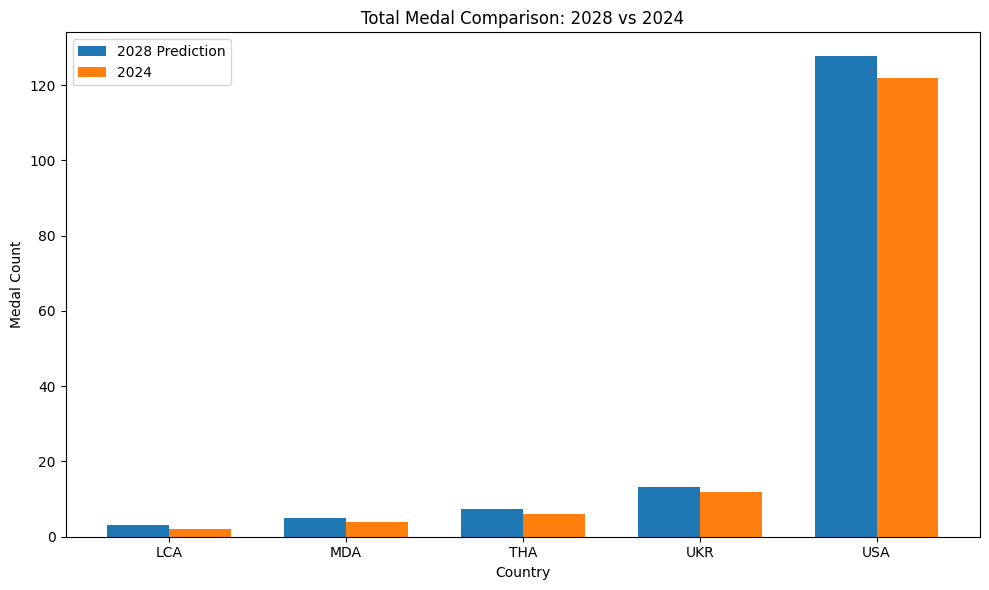

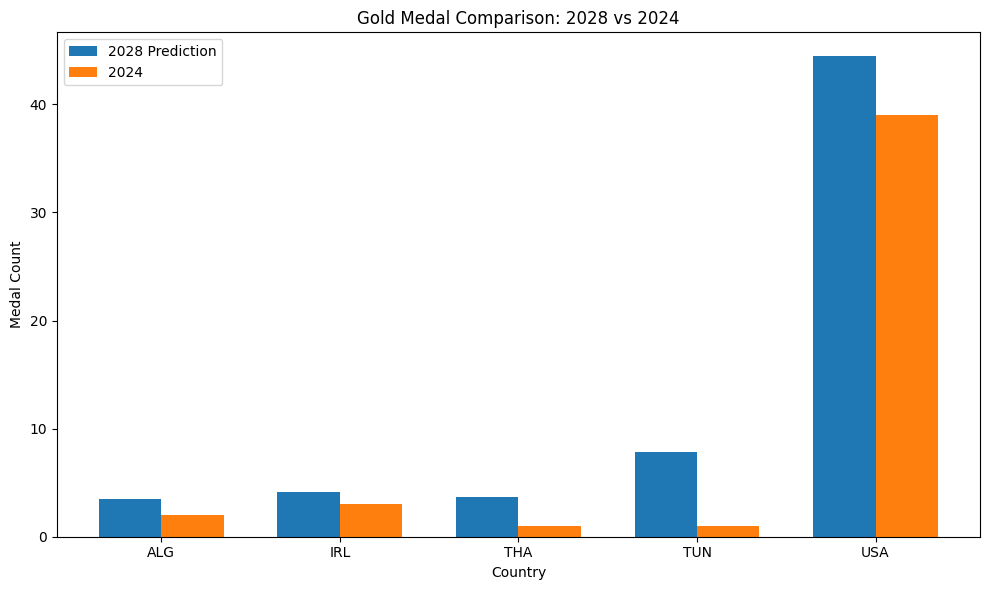

In [136]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

assert os.path.exists('./scratch/medal_board_2024_GoldMedal.csv')
assert os.path.exists('./scratch/medal_board_2024_TotalMedal.csv')

assert os.path.exists('./mid_data/medal_board_2028_GoldMedal.csv')
assert os.path.exists('./mid_data/medal_board_2028_TotalMedal.csv')

total_medal_2024 = pd.read_csv('./scratch/medal_board_2024_TotalMedal.csv').sort_values(by='Country')
gold_medal_2024 = pd.read_csv('./scratch/medal_board_2024_GoldMedal.csv').sort_values(by='Country')

total_medal_2028 = pd.read_csv('./mid_data/medal_board_2028_TotalMedal.csv').iloc[:, :2].sort_values(by='Country')
gold_medal_2028 = pd.read_csv('./mid_data/medal_board_2028_GoldMedal.csv').iloc[:, :2].sort_values(by='Country')


# 总牌

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

assert os.path.exists('./scratch/')

ascending = False

total_countries = ['USA', 'UKR', 'THA', 'LCA', 'MDA']
gold_countries = ['USA', 'THA', 'IRL', 'ALG', 'TUN']

# 示例数据  
df_2028 = total_medal_2028[total_medal_2028['Country'].isin(total_countries)]
df_2024 = total_medal_2024[total_medal_2024['Country'].isin(total_countries)]

df_2028.to_csv('./scratch/total_medal_2028.csv')
df_2024.to_csv('./scratch/total_medal_2024.csv')

# 合并数据  
df = pd.merge(df_2028, df_2024, on='Country', suffixes=('_2028', '_2024'))  

# 绘制分组柱状图  
x = np.arange(len(df['Country']))  # 国家索引  
width = 0.35  # 柱子宽度  

fig, ax = plt.subplots(figsize=(10, 6))  
bar1 = ax.bar(x - width/2, df['Medal_2028'], width, label='2028 Prediction')  
bar2 = ax.bar(x + width/2, df['Medal_2024'], width, label='2024')  

# 添加标签和标题  
ax.set_xlabel('Country')  
ax.set_ylabel('Medal Count')  
ax.set_title('Total Medal Comparison: 2028 vs 2024')  
ax.set_xticks(x)  
ax.set_xticklabels(df['Country'])  
ax.legend()  

# 显示图表  
plt.tight_layout()  
plt.show()


# 金牌

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# 示例数据  
df_2028 = gold_medal_2028[gold_medal_2028['Country'].isin(gold_countries)]
df_2024 = gold_medal_2024[gold_medal_2024['Country'].isin(gold_countries)]

df_2028.to_csv('./scratch/gold_medal_2028.csv')
df_2024.to_csv('./scratch/gold_medal_2024.csv')

# 合并数据  
df = pd.merge(df_2028, df_2024, on='Country', suffixes=('_2028', '_2024'))  

# 绘制分组柱状图  
x = np.arange(len(df['Country']))  # 国家索引  
width = 0.35  # 柱子宽度  

fig, ax = plt.subplots(figsize=(10, 6))  
bar1 = ax.bar(x - width/2, df['Medal_2028'], width, label='2028 Prediction')  
bar2 = ax.bar(x + width/2, df['Medal_2024'], width, label='2024')  

# 添加标签和标题  
ax.set_xlabel('Country')  
ax.set_ylabel('Medal Count')  
ax.set_title('Gold Medal Comparison: 2028 vs 2024')  
ax.set_xticks(x)  
ax.set_xticklabels(df['Country'])  
ax.legend()  

# 显示图表  
plt.tight_layout()  
plt.show()

输出提高、降低对比文件。又到了发挥主观能动性的时候了。

构造数据并保存数据：

In [113]:
df_2028 = total_medal_2028
df_2024 = total_medal_2024

# 合并数据  
df = pd.merge(df_2028, df_2024, on='Country', suffixes=('_2028', '_2024'))
df['Diff'] = df['Medal_2028'] - df['Medal_2024']
df = df[ abs(df['Diff'])>=1 ]

def sigmoid(x):  
    return 1 / (1 + np.exp(-x)) 

df['Probability'] = sigmoid(np.abs(1/df['Diff'])) - np.random.uniform(0.2, 0.4, size=len(df))
df.sort_values(by='Probability', ascending=False)

df.loc[df['Country']=='USA', 'Probability'] += 0.4
df.sort_values(by='Probability', ascending=False, inplace=True)
df.to_csv('./scratch/better_worse_cmp_gold-t.csv', index=False)

读入数据

In [135]:
import pandas as pd

df = pd.read_csv('./scratch/better_worse_cmp.csv')

print("总牌最有可能降低的前五：")
print(df[ df['Diff'] < 0 ].head(5))
print(list(df[ df['Diff'] < 0 ].head(5)['Country']))

print("总牌最有可能提高的前五：")
print(df[ df['Diff'] > 0 ].head(5))
print(list(df[ df['Diff'] > 0 ].head(5)['Country']))

df = pd.read_csv('./scratch/better_worse_cmp_gold.csv')

print("金牌最有可能降低的前五：")
print(df[ df['Diff'] < 0 ].head(5))
print(list(df[ df['Diff'] < 0 ].head(5)['Country']))

print("金牌最有可能提高的前五：")
print(df[ df['Diff'] > 0 ].head(5))
print(list(df[ df['Diff'] > 0 ].head(5)['Country']))


总牌最有可能降低的前五：
   Country  Medal_2028  Medal_2024      Diff  Probability
11     UZB   11.613587          13 -1.386413     0.376079
20     NED   32.880360          34 -1.119640     0.347346
36     NOR    6.923304           8 -1.076696     0.327930
39     KEN    8.585329          11 -2.414671     0.322110
41     BUL    5.222267           7 -1.777733     0.319191
['UZB', 'NED', 'NOR', 'KEN', 'BUL']
总牌最有可能提高的前五：
  Country  Medal_2028  Medal_2024      Diff  Probability
0     USA  127.639670         122  5.639670     0.535130
1     UKR   13.089783          12  1.089783     0.509485
2     THA    7.376343           6  1.376343     0.466002
3     LCA    3.014772           2  1.014772     0.437122
4     MDA    5.077600           4  1.077600     0.426428
['USA', 'UKR', 'THA', 'LCA', 'MDA']
金牌最有可能降低的前五：
   Country  Medal_2028  Medal_2024      Diff  Probability
3      UZB   11.613587          13 -1.386413     0.391657
4      BUL    5.222267           7 -1.777733     0.389895
13     NOR    6.923304   